In [1]:
import pandas as pd

df = pd.read_csv('data/num2word_dataset.csv')

In [2]:
df.head()

,text_index,base_text,converted_text,was_changed
0,de98a2b3-5fa2-4e6c-a7d4-deb04ebb8662,Бои у Сопоцкина и Друскеник закончились отступ...,Бои у Сопоцкина и Друскеник закончились отступ...,0
1,de98a2b3-5fa2-4e6c-a7d4-deb04ebb8662,"Неприятель , приблизившись с севера к Осовцу н...","Неприятель , приблизившись с севера к Осовцу н...",0
2,de98a2b3-5fa2-4e6c-a7d4-deb04ebb8662,В артиллерийском бою принимают участие тяжелые...,В артиллерийском бою принимают участие тяжелые...,0
3,de98a2b3-5fa2-4e6c-a7d4-deb04ebb8662,С раннего утра 14 сентября огонь достиг значит...,С раннего утра 14 сентября огонь достиг значит...,0
4,de98a2b3-5fa2-4e6c-a7d4-deb04ebb8662,Попытка германской пехоты пробиться ближе к кр...,Попытка германской пехоты пробиться ближе к кр...,0


In [4]:
import seaborn as sns

In [37]:
text_to_sentence = []
sentence_lengths = []
changed_count = 0
cur_uuid = None
count = 0
for index, row in df.iterrows():
    if row['text_index'] != cur_uuid:
        if cur_uuid: text_to_sentence.append(count)
        count = 0
        cur_uuid = row['text_index']
    
    count += 1
    changed_count += row['was_changed']
    sentence_lengths.append(len(row['base_text']))

f'word2num: {changed_count/len(df) * 100:.2f}%'

'word2num: 13.71%'

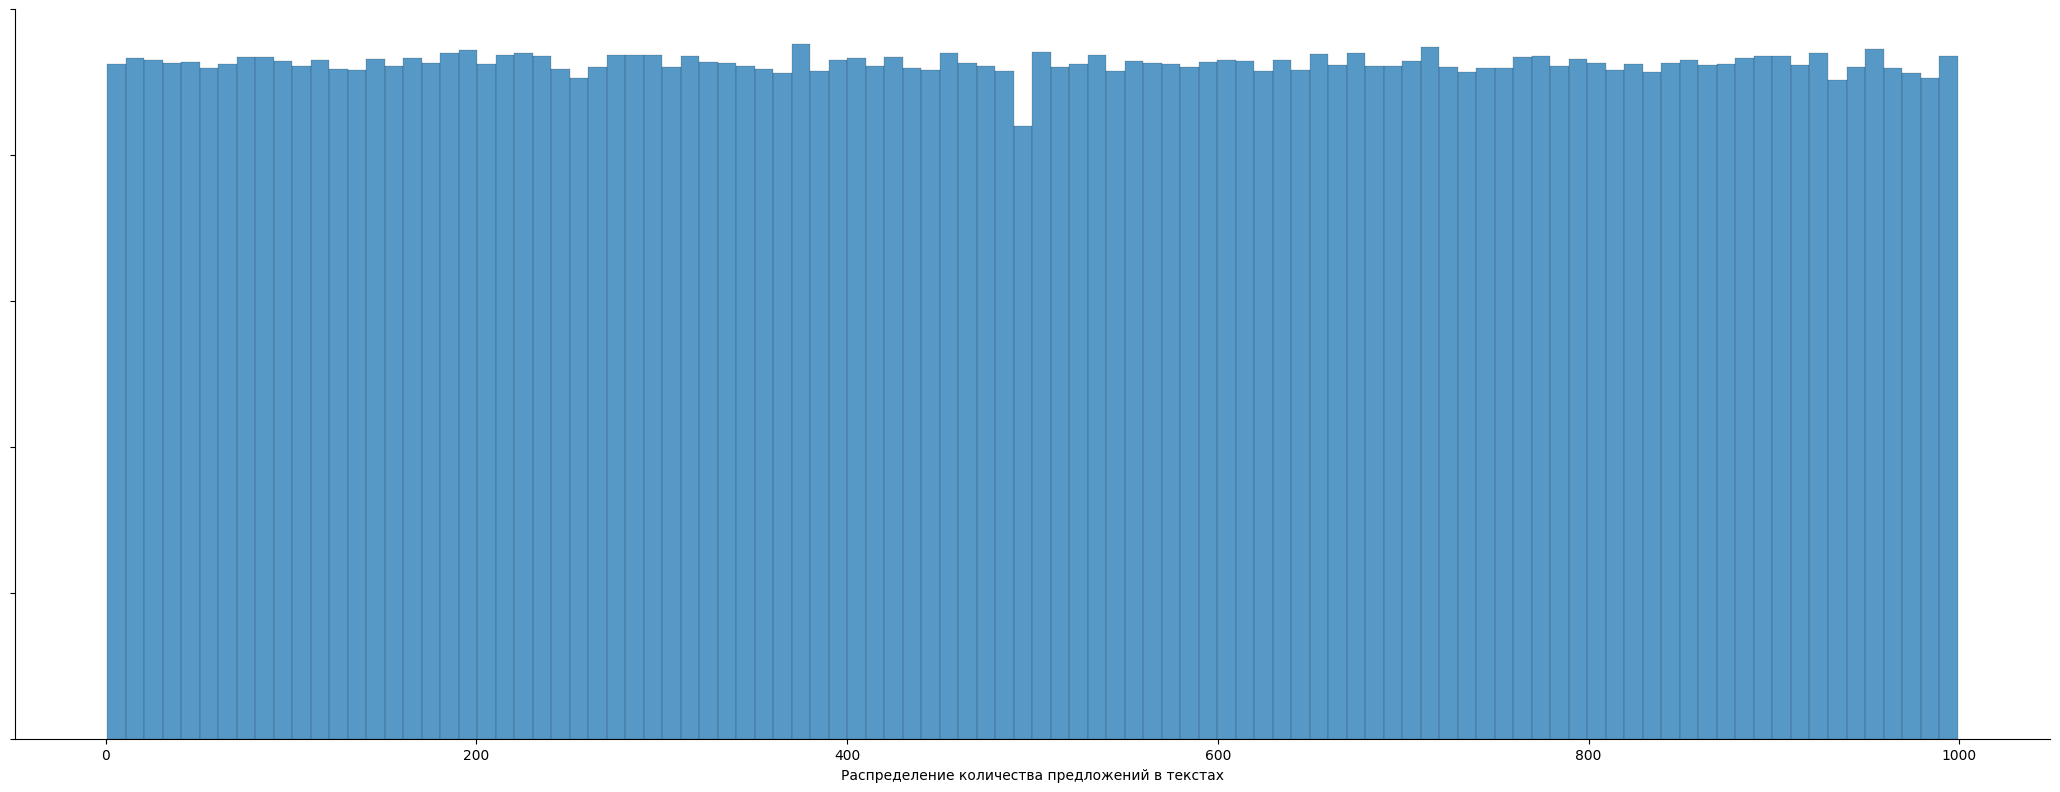

In [33]:
pp = sns.pairplot(data=pd.DataFrame(data=text_to_sentence))
pp.set(ylabel='')
pp.set(xlabel='Распределение количества предложений в текстах')
pp.set(yticklabels=[])
pp.fig.set_size_inches(30, 10)